# Постановка задачи

Необходимо предсказать риск проблем с сердцем (колонка output) на основе [данных](https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset).

Примечание: рассмотреть не только knn, но и другие классификаторы, попробовать обучить несколько из них и сравнить полученный результат по метрикам качества на тесте.

# Описание датасета

Ниже описаны признаки, которые являются заголовками таблицы:

age - возраст пациента

sex - пол пациента (0 - женщина, 1 - мужчина)

cp - тип боли в груди:


*   значение 0: типичная стенокардия
*   значение 1: атипичная стенокардия
*   значение 2: без признаков стенокардии
*   значение 3: бессимптомная

trtbps - артериальное давление в состоянии покоя

chol - показатель значения холестерина

fbs - показатель уровня сахара в крови натощак > 120 мг/дл (1-True, 0 - Flase)

restecg - результаты ЭКГ в состоянии покоя

*   значение 0: норма
*   значение 1: наличие аномалий ST-T (инверсии T-волны и/или повышение или понижение ST > 0,05 мВ)
*   значение 2: с вероятной или определенной гипертрофией левого желудочка по критериям Эстеса

thalach - достигнутая максимальная частота сердечных сокращений

exng - стенокардия, вызванная физической нагрузкой (1-True, 0 - False)

oldpeak - снижение ST, вызванное физической нагрузкой по сравнению с покоем

slope - наклон сегмента ST во время пиковой нагрузки (2 - восходящий; 1 - плоский; 0 - нисходящий)

caa - количество крупных/расширенных сосудов (0-3)

thal - (2 - норма; 1 - фиксированный дефект; 3 - обратимый дефект)

output - (0 - низкая вероятность сердечного приступа, 1 - высокая вероятность сердечного приступа)




# Начало работы с данными

## Импорт и ознакомление

Первоначально импортируем все библиотеки, которые потребуются нам на протяжении всей работы в ноутбуке

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Загрузим данные в датафрейм из .csv-файла, который предварительно был загружен на google-диск

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/heart.csv')
# df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# посмотрим на  информацию, загруженную в датафрейм
df.info

<bound method DataFrame.info of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  ou

## Первичное исследование данных

Проверим датасет на наличие дубликатов

In [ ]:
# передав в качетсве аругмента keep=False можно увидеть обе строки
# в которых дублируется информация
df[df.duplicated(keep=False) == True]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


Строки с индексами 163 и 164 полностью идентичны, значит можно избавиться от одной из них

In [ ]:
df = df.drop_duplicates()
df.shape[0]  # в новом датафрейме стало на одну строку меньше

302

In [ ]:
# смотрим максимальные значения числовых признаков
df[["age","trtbps","chol","thalachh","oldpeak"]].max()

age          77.0
trtbps      200.0
chol        564.0
thalachh    202.0
oldpeak       6.2
dtype: float64

Проверка на пропуски

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
df.caa.value_counts()

0    175
1     65
2     38
3     20
4      4
Name: caa, dtype: int64

В источнике данных указано, что признак caa может принимать значения 0-3, тут мы видим 5 человек со значением 4, но я не стал избавляться от этих данных

In [ ]:
df.thall.value_counts()

2    165
3    117
1     18
0      2
Name: thall, dtype: int64

Аналогичная ситуация с thall

In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Видим достаточно высокое значение std у признака chol (51.830751 при среднем 246.264026)

In [ ]:
df.sort_values(by='chol', ascending=False).head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
215,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0


Максимальное значение уровня холестерина похоже на выброс, визуализируем это для наглядности

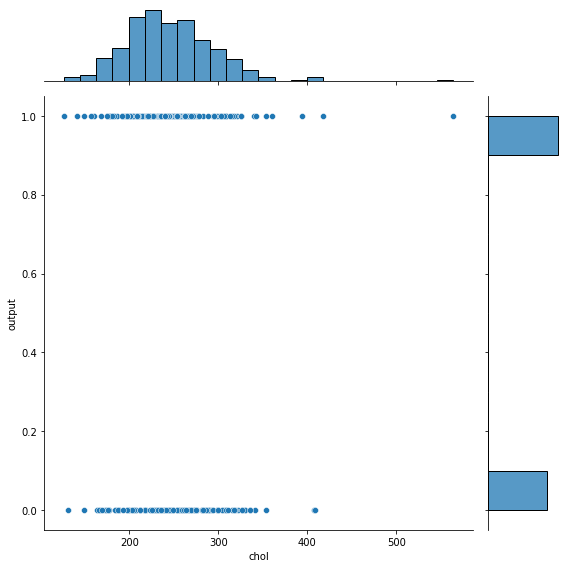

In [ ]:
sns.jointplot(df['chol'], df['output'], height=8)

Удалю строку, которая содержит это значение

In [ ]:
df.drop(index=85, inplace=True)

In [ ]:
df.shape

(301, 14)

Так как я часто слышал что заболевания сердца могут иметь зависимость от уровня холестерина мне хочется проверить эту гипотезу на данном наборе данных.

Проверим влияет ли уровень холестерина, превышающий средний показатель по всей нашей выборке на вероятность сердечного приступа.

Первоначально оценим процентное соотношение людей с уровнем холесерина выше среднего ко всему количеству людей из выборки.

In [ ]:
counter = 0
for i in (df.chol > df.chol.mean()):
    if i == True:
        counter += 1
print(f'Людей с уровнем холестерина ниже среднего: {df.shape[0] - counter}')
print(f'Людей с уровнем холестерина выше среднего: {counter}, что составляет {round((counter*100/df.shape[0]), 2)}% от общего количества людей в выборке.')


Людей с уровнем холестерина ниже среднего: 163
Людей с уровнем холестерина выше среднего: 138, что составляет 45.85% от общего количества людей в выборке.


In [ ]:
pd.crosstab(df.output, df.chol > df.chol.mean())

chol,False,True
output,,
0,63,75
1,100,63


В результате прямая зависимость повышенного уровня холестерина и риска сердечного приступа на данной выборке не подтвердилась, исходя из следующего: людей с холестерином выше среднего незначительно меньше (138 против 164), чем людей с холестерином ниже среднего, однако из сводной таблицы выше видно, что


*   людей с уровнем холестерина **ниже среднего**: с низкой вероятностью сердечного приступа - 63, с высокой вероятностью сердечного приступа - 100 (*если бы уровень холестерина имел прямую зависимость с повышенной вероятностью возникновения сердечного приступа, то в данном случае соотношение было бы обратным, но не 63 с низким риском/101 с высоким риском)*
*   людей с уровнем холестерина **выше среднего**: с низкой вероятностью сердечного приступа - 75, с высокой вероятностью сердечного приступа - 63


Построим гистограммы для каждого признака

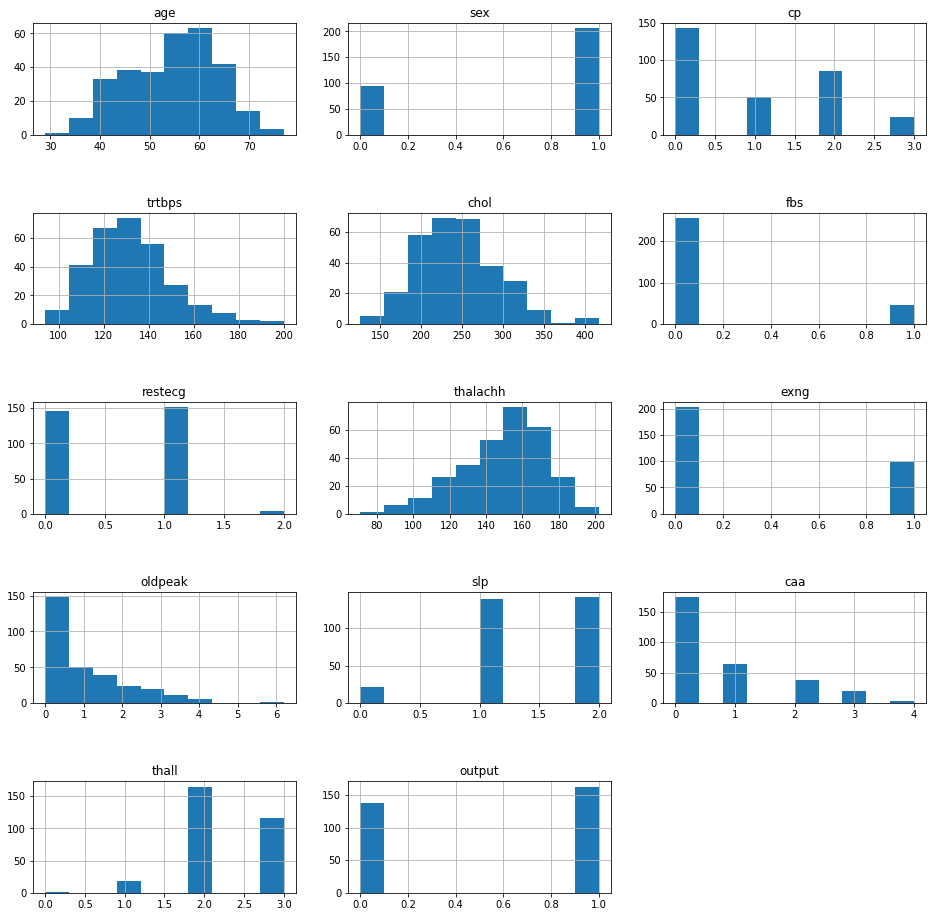

In [ ]:
fig = plt.figure(figsize=(16,16))
cols = 3

rows = 5
for i, column in enumerate(df.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    df[column].hist(axes=ax)
plt.subplots_adjust(hspace=0.7, wspace=0.2)

Из беглого просмотра графиков выше, можно увидеть что выборка несбалансированна по половому признаку (количество женщин в два раза меньше количества мужчин)

Построим корреляционную матрицу, чтобы посмотреть на зависимость каких числовых признаков стоит обратить внимание

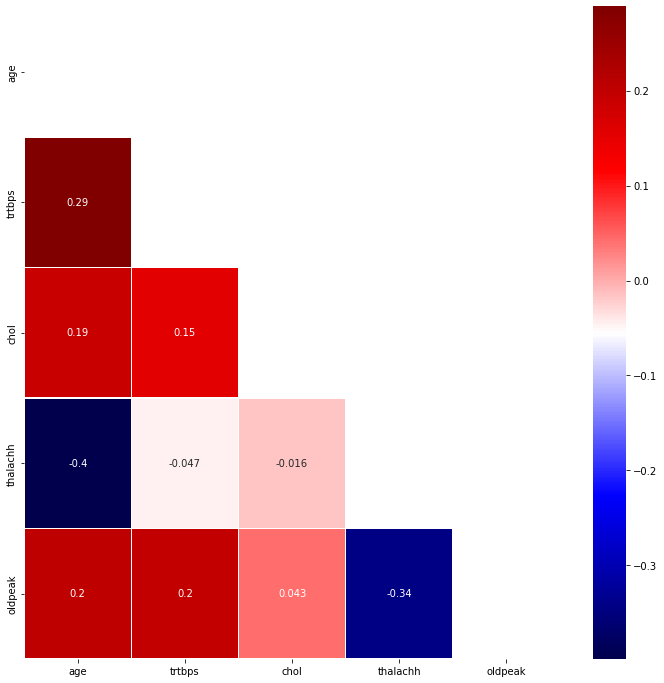

In [ ]:
plt.subplots(figsize=(12,12))
con_colums = ["age","trtbps","chol","thalachh","oldpeak"]
sns.heatmap(df[con_colums].corr(), annot=True, linewidth=0.5, mask=np.triu(df[con_colums].corr()), cmap="seismic")

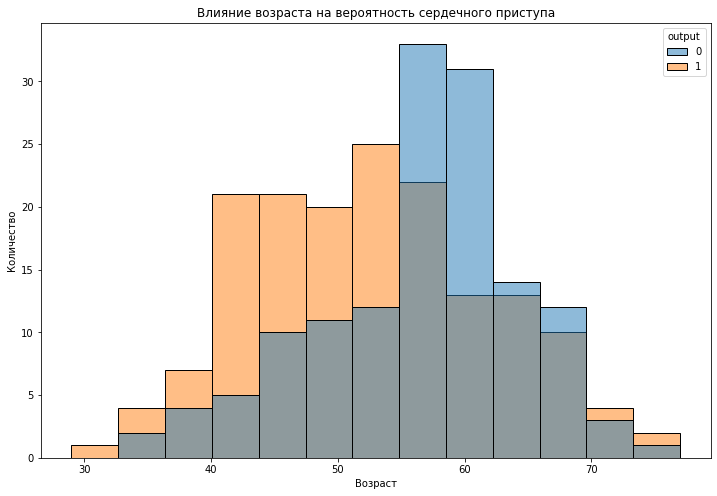

In [ ]:
plt.figure(figsize=(12, 8))

sns.histplot(data=df, x='age', hue='output')
plt.title('Влияние возраста на вероятность сердечного приступа')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

Можно сделать вывод, что люди в возрастном диапазоне от 40 лет до ~58 лет больше подвержены риску возникновения сердечного приступа.

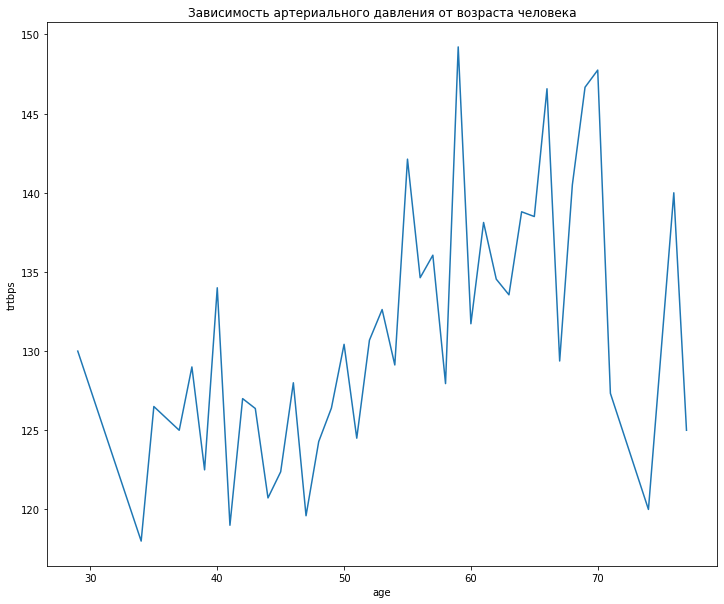

In [ ]:
plt.figure(figsize=(12,10))
sns.lineplot(x="age", y="trtbps", ci=None, data=df);
plt.title("Зависимость артериального давления от возраста человека")
plt.show()

Из графика видно, что с возрастом человека возрастает показатель артериального давления

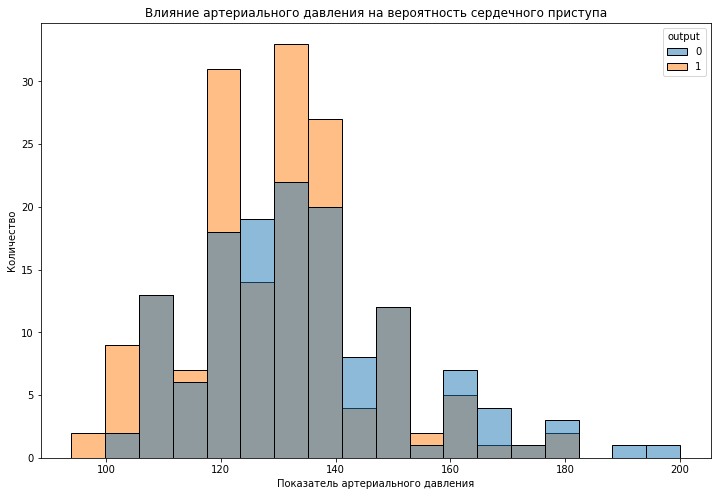

In [ ]:
plt.figure(figsize=(12, 8))

sns.histplot(data=df, x='trtbps', hue='output')
plt.title('Влияние артериального давления на вероятность сердечного приступа')
plt.xlabel('Показатель артериального давления')
plt.ylabel('Количество')
plt.show()

In [ ]:
low_trtbps = df[df.trtbps < 110]['output'].sum()
print(f'В {low_trtbps} случаях из {df[df.trtbps < 110].shape[0]} люди с '
    'показателем артериального давления ниже 110 оказались подвержены '
    'риску сердечного приступа')

В 16 случаях из 20 люди с показателем артериального давления ниже 110 оказались подвержены риску сердечного приступа


In [ ]:
df[df.trtbps < 110]['sex'].value_counts()

0    10
1    10
Name: sex, dtype: int64

Стоит отметить что в данной выборке из 20 человек представителей мужского и женского пола было поровну

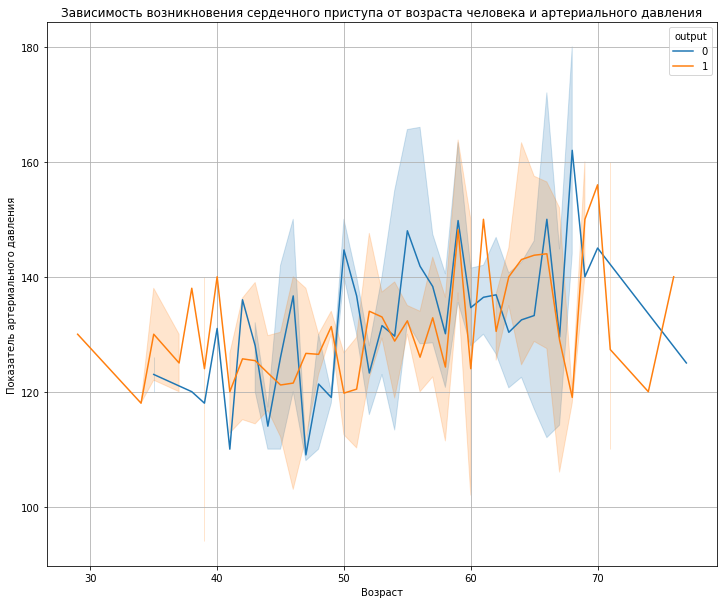

In [ ]:
plt.figure(figsize=(12,10))
sns.lineplot(x="age",y="trtbps",hue="output",data=df)
plt.title("Зависимость возникновения сердечного приступа от возраста человека и артериального давления")
plt.xlabel('Возраст')
plt.ylabel('Показатель артериального давления')
plt.grid()
plt.show()

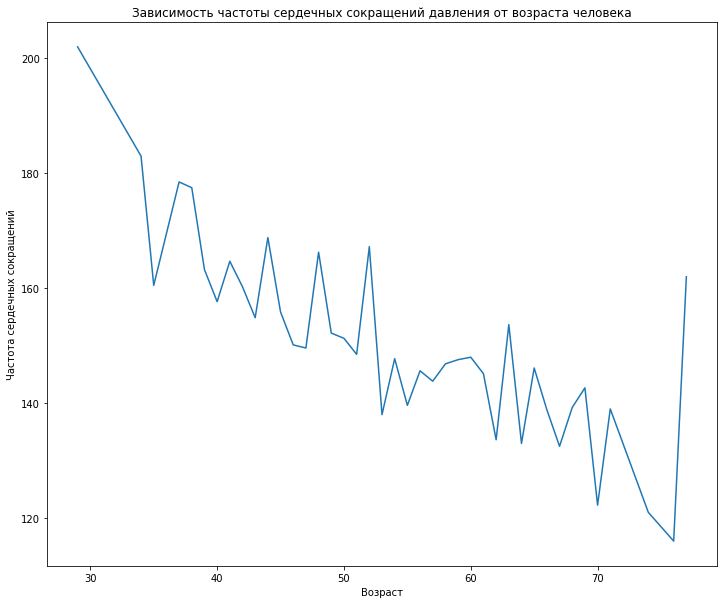

In [ ]:
plt.figure(figsize=(12,10))
sns.lineplot(x="age", y="thalachh", ci=None, data=df);
plt.title("Зависимость частоты сердечных сокращений давления от возраста человека")
plt.xlabel('Возраст')
plt.ylabel('Частота сердечных сокращений')
plt.show()

Максимальная частота сердечных сокращений с возрастом снижается

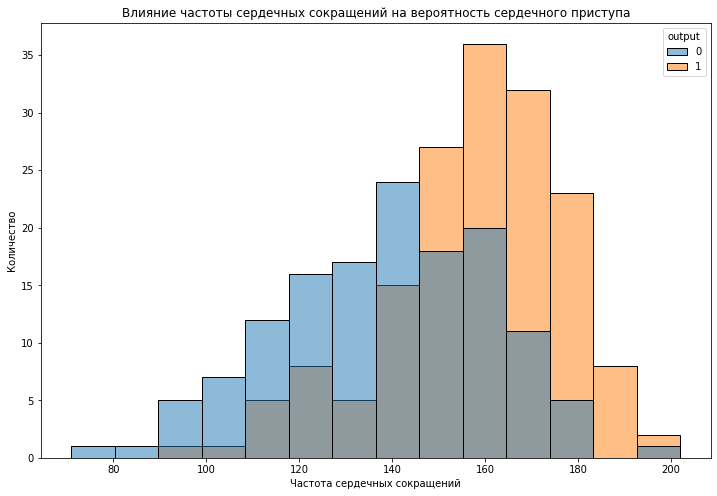

In [ ]:
plt.figure(figsize=(12, 8))

sns.histplot(data=df, x='thalachh', hue='output')
plt.title('Влияние частоты сердечных сокращений на вероятность сердечного приступа')
plt.xlabel('Частота сердечных сокращений')
plt.ylabel('Количество')
plt.show()

При превышении показателя частоты сердечных сокращений в 160, возрастает вероятность риска сердечного приступа

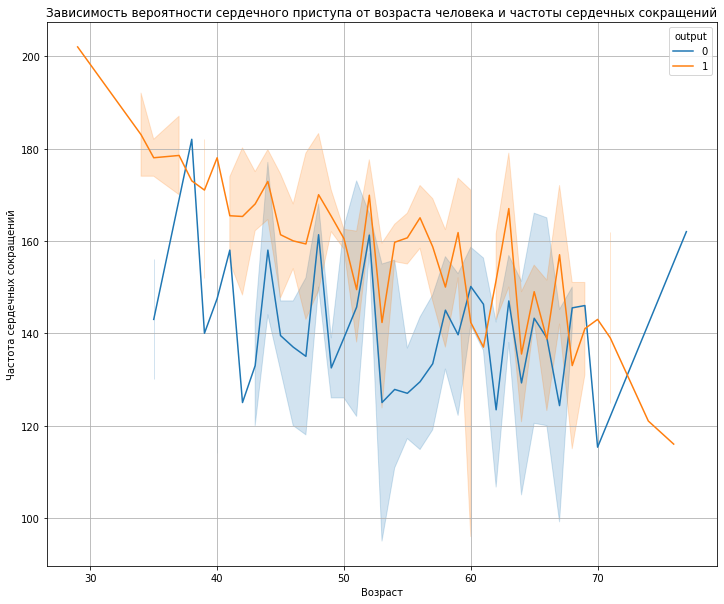

In [ ]:
plt.figure(figsize=(12,10))
sns.lineplot(x="age",y="thalachh",hue="output",data=df)
plt.title("Зависимость вероятности сердечного приступа от возраста человека и частоты сердечных сокращений")
plt.xlabel('Возраст')
plt.ylabel('Частота сердечных сокращений')
plt.grid()
plt.show()

### **Вывод**



1.   Из графиков выше мы смогли выделить возрастную группу, которая наиболее подвержена возникновению сердечного приступа - это люди в возрасте от 40 лет до ~58 лет;
2.   При превышении отметки показателя частоты сердечных сокращений в 160, возрастает вероятность риска сердечного приступа;
3.   Люди, с низким уровенем артериального давления (менее 110) подвержены возникновению сердечного приступа, вне зависимости от полового признака;
4.   Повышенный/пониженный уровни холестерина не показали прямую взаимосвязь с возникновением сердечного приступа.




# KNN

Для начала воспользуемся моделью k-ближайших соседей.

Импортируем из библиотеки sklearn нужные нам модули

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn import metrics

Разделим наши данные на 2 массива:


1.   X - признаки
2.   y - целевые метки (истинные значения)



In [ ]:
X = np.array(df[df.drop(columns=['output']).columns])  # удаляем столбец output
y = df['output'].values  # используем столбец output в качестве целевых меток

In [ ]:
X.shape, y.shape

((301, 13), (301,))

Теперь инициализируем алгоритм KNN и разделим массивы с признаками и целевыми метками на обучающую и тестовую выборки (80% и 20% соответственно)

In [ ]:
knn = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)

Запускаем обучение модели и получаем предсказания на основе тестовой выборки

In [ ]:
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

Теперь сравним предсказанные значения моделью (preds) и истинные (y_test), передав два этих массива в функцию accuracy_score

In [ ]:
accuracy_score(y_test, preds)

0.6065573770491803

Мы получили долю верно предсказанных значений, в дальнейшем мы увидим что этот показатель далеко не самый лучший

In [ ]:
# выведем отчет по метрикам
print(metrics.classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.73      0.47      0.57        34
           1       0.54      0.78      0.64        27

    accuracy                           0.61        61
   macro avg       0.63      0.62      0.60        61
weighted avg       0.64      0.61      0.60        61



## Кросс-валидация

Для более точной оценки работы модели будем использовать кросс-валидацию, вместе с перебором значения гиперпараметра k.

Будем разбивать весь набор на 5 фолдов, 1 из которых будет тестовым.

Импортируем модуль для работы с кросс-валидацией из sklearn

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Создаем объект кросс-валидации
knn_grid = {'n_neighbors': np.array(np.linspace(1, 100, 100), dtype='int')}
cross_val = GridSearchCV(knn, knn_grid, cv=5, n_jobs=-1)

In [ ]:
# Обучаем
cross_val.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])})

Воспользуюсь функцией с лекции для построения графика зависимости доли верных ответов от гиперпараметра k

In [ ]:
def grid_plot(x, y, x_label, title, y_label='cross_val'):
    plt.figure(figsize=(16, 6))
    plt.grid(True)
    plt.plot(x, y, 'go-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

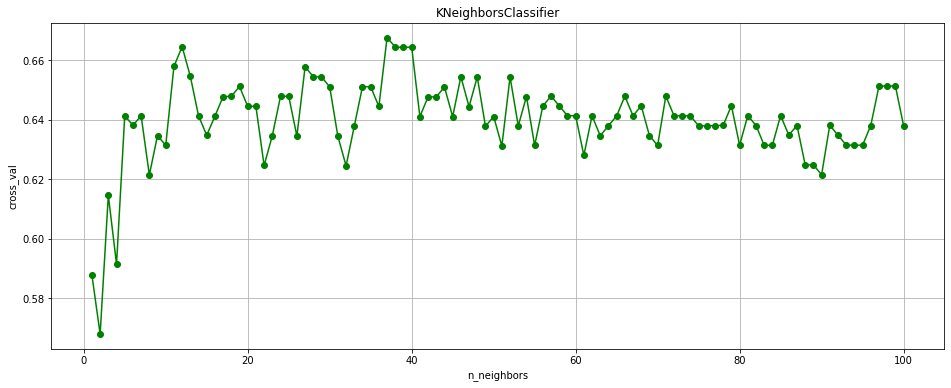

In [ ]:
grid_plot(knn_grid['n_neighbors'], cross_val.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

Видно, что можно было бы взять меньшее число соседей (<50), но так как набор данных небольшой и все вычисления происходят быстро я пренебрег этим

Выведем лучшее k, и значение accuracy, соответствующее этому k

In [ ]:
cross_val.best_params_, cross_val.best_score_

({'n_neighbors': 37}, 0.6675956284153005)

Значение accuracy увеличилось, но можно сделать лучше, ведь числовые признаки остались ненормированными, а категориальные незакодированы

## Кодирование категориальных признаков и нормирование числовых признаков

Для начала разделим все признаки на 3 массива:

**cat_columns** - *массив со столбцами, являющимися категориальными признаками*

**con_colums** - *массив со столбцами, являющимися числовыми признаками*

**target** - *столбец с целевыми метками*

In [ ]:
cat_columns = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_columns = ["age","trtbps","chol","thalachh","oldpeak"]
target = ["output"]

In [ ]:
# отобразим числовые признаки
df[con_columns]

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


Для кодирования категориальных признаков воспользуемся pandas.get_dummies()

In [ ]:
# создаем копию нашего датафрейма
df_copy = df

In [ ]:
# для теста разных способов кодирования создадим ещё одну копию датафрейма
df_copy2 = df

In [ ]:
# кодируем категориальные признаки в df_copy, используя pandas.get_dummies()
df_сopy = pd.get_dummies(df_copy, columns = cat_columns, drop_first = True)

In [ ]:
df_сopy.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,exng_1,caa_1,caa_2,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,1,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,57,120,354,163,0.6,1,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0


Закодируем категориальные признаки во второй копии датасета (df_copy2) с использованием preprocessing.LabelEncoder() из библиотеки sklearn

In [ ]:
from sklearn import preprocessing
encoders = {}

for column in df_copy2:
    if column in cat_columns:
        encoders[column] = preprocessing.LabelEncoder()
        df_copy2[column] = encoders[column].fit_transform(df_copy2[column])
print(encoders)
df_copy2.head()


{'sex': LabelEncoder(), 'cp': LabelEncoder(), 'fbs': LabelEncoder(), 'restecg': LabelEncoder(), 'exng': LabelEncoder(), 'slp': LabelEncoder(), 'caa': LabelEncoder(), 'thall': LabelEncoder()}


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Разделим признаки и целевые метки df_copy

In [ ]:
X = df_сopy.drop(['output'], axis=1)
y = df_сopy[['output']]

In [ ]:
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,41,130,204,172,1.4,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,56,120,236,178,0.8,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,57,120,354,163,0.6,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


Аналогично для df_copy2

In [ ]:
X2 = df_copy2.drop(['output'], axis=1)
y2 = df_copy2[['output']]

In [ ]:
# нормирование значений числовых признаков массива X (признаки df_copy)
scaler = RobustScaler()
X[con_columns] = scaler.fit_transform(X[con_columns])
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.615385,0.75,-0.111111,-0.060606,0.9375,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,-1.384615,0.00,0.158730,1.060606,1.6875,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.076923,0.00,-0.571429,0.606061,0.3750,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.076923,-0.50,-0.063492,0.787879,0.0000,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.153846,-0.50,1.809524,0.333333,-0.1250,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [ ]:
# нормирование значений числовых признаков массива X2 (признаки df_copy2)
scaler = RobustScaler()
X2[con_columns] = scaler.fit_transform(X[con_columns])
X2.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.615385,1,3,0.75,-0.111111,1,0,-0.060606,0,0.9375,0,0,1
1,-1.384615,1,2,0.00,0.158730,0,1,1.060606,0,1.6875,0,0,2
2,-1.076923,0,1,0.00,-0.571429,0,0,0.606061,0,0.3750,2,0,2
3,0.076923,1,1,-0.50,-0.063492,0,1,0.787879,0,0.0000,2,0,2
4,0.153846,0,0,-0.50,1.809524,0,1,0.333333,1,-0.1250,2,0,2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state = 10)

Кросс-валидация после нормирования и кодирования

In [ ]:
cross_val = GridSearchCV(knn, knn_grid, cv=5, n_jobs=-1)

In [ ]:
cross_val.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])})

In [ ]:
cross_val.best_params_, cross_val.best_score_

({'n_neighbors': 6}, 0.8239344262295083)

В результате наблюдаем прирост значения accuracy (0.6675956284153005 старое значение, против 0.8239344262295083)

Сравним с результатами LabelEncoder()

In [ ]:
cross_val.fit(X2, y2)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])})

In [ ]:
cross_val.best_params_, cross_val.best_score_

({'n_neighbors': 5}, 0.8206557377049182)

### Вывод

Показатель accuracy у модели с закодированными категориальными признаками с использованием pandas.get_dummies() выше, чем у модели с использованием LabelEncoder(). Но стоит отметить что прирост незначительный.

**get_dummies(): 0.8239344262295083**

**LabelEncoder(): 0.8206557377049182**

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# инициализация модели
logreg = LogisticRegression(random_state = 10)
# обучение модели
logreg.fit(X_train, y_train)
# вычисление массива с предсказанными значениями
y_pred_proba = logreg.predict_proba(X_test)
y_pred = np.argmax(y_pred_proba,axis=1)

print("Оценка Logistric Regression по метрике accuracy:", accuracy_score(y_test, y_pred))

Оценка Logistric Regression по метрике accuracy: 0.8032786885245902


In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.62      0.74        34
           1       0.66      0.93      0.77        27

    accuracy                           0.75        61
   macro avg       0.79      0.77      0.75        61
weighted avg       0.80      0.75      0.75        61



In [ ]:
# CV
from sklearn.model_selection import cross_val_score

cv_result_mse = cross_val_score(logreg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_result_rmse = cross_val_score(logreg, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
cv_result_f1 = cross_val_score(logreg, X_train, y_train, cv=5, scoring='f1')

print('MSE Scores: ',cv_result_mse)
print('RMSE Scores: ',cv_result_rmse)
print('f1 Scores: ',cv_result_f1)
print(f'MSE Scores average: {np.sum(cv_result_mse)/5}, RMSE Scores average: {np.sum(cv_result_rmse)/5}, f1 Scores average: {np.sum(cv_result_f1)/5}')

MSE Scores:  [-0.1875     -0.20833333 -0.125      -0.10416667 -0.125     ]
RMSE Scores:  [-0.4330127  -0.45643546 -0.35355339 -0.32274861 -0.35355339]
f1 Scores:  [0.83636364 0.81481481 0.89285714 0.90566038 0.89655172]
MSE Scores average: -0.15, RMSE Scores average: -0.3838607119700713, f1 Scores average: 0.8692495391064032


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(random_state=10)
DTC.fit(X_train, y_train)
y_pred_proba = DTC.predict_proba(X_test)
y_pred = np.argmax(y_pred_proba,axis=1)
print("Оценка DecisionTreeClassifier по метрике accuracy:", accuracy_score(y_test, y_pred))

Оценка DecisionTreeClassifier по метрике accuracy: 0.7049180327868853


In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73        34
           1       0.66      0.70      0.68        27

    accuracy                           0.70        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.71      0.70      0.71        61



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFST = RandomForestClassifier(random_state=10)
RFST.fit(X_train, y_train)
y_pred_proba = RFST.predict_proba(X_test)
y_pred = np.argmax(y_pred_proba,axis=1)
print("Оценка DecisionTreeClassifier по метрике accuracy:", accuracy_score(y_test, y_pred))

Оценка DecisionTreeClassifier по метрике accuracy: 0.7540983606557377


In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.65      0.75        34
           1       0.67      0.89      0.76        27

    accuracy                           0.75        61
   macro avg       0.77      0.77      0.75        61
weighted avg       0.79      0.75      0.75        61



# SVC

In [ ]:
from sklearn.svm import SVC

SK_SVC = SVC(random_state=10, probability=True)
SK_SVC.fit(X_train, y_train)
y_pred_proba = SK_SVC.predict_proba(X_test)
y_pred = np.argmax(y_pred_proba,axis=1)
print("Оценка SVC по метрике accuracy:", accuracy_score(y_test, y_pred))

Оценка SVC по метрике accuracy: 0.7868852459016393


In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.68      0.78        34
           1       0.69      0.93      0.79        27

    accuracy                           0.79        61
   macro avg       0.81      0.80      0.79        61
weighted avg       0.82      0.79      0.79        61



## Вывод

Лучший результат показала модель логистической регрессии с кросс-валидацией. Результат f1 score 0.8692495391064032
